### Importing Necessary Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [2]:
file_path = 'train.csv'

train_df = pd.read_csv(file_path)

train_df.head(5)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


### Data Cleaning and EDA

In [3]:
train_df.shape

(517754, 14)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [5]:
train_df.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [6]:
train_df.duplicated().sum()

0

### Feature Engineering

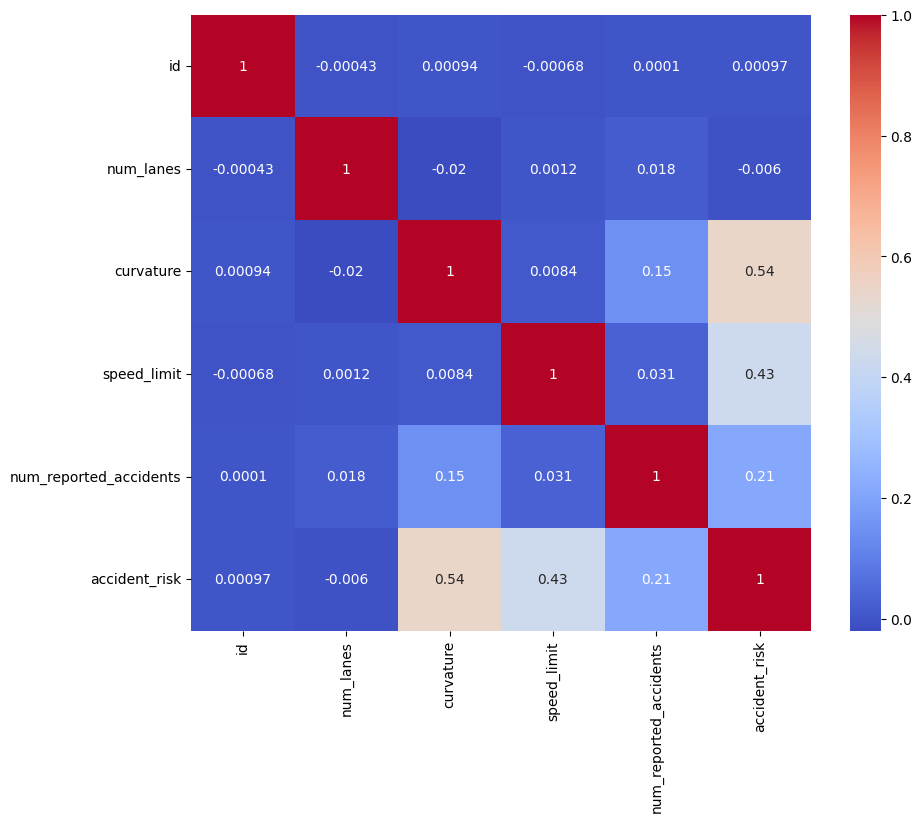

In [7]:
columns = [col for col in train_df.columns if train_df[col].dtype != 'object' and train_df[col].dtype != 'bool']
num_train_df = train_df[columns]
plt.figure(figsize=(10, 8))
sns.heatmap(num_train_df.corr(), annot=True, cmap='coolwarm')
plt.show()

A less correlation can be seen among various variables hence no multicollinearity is present in the data



## Conclusion of EDA and Data Cleaning:
* Since Data does not contain any nan values hence no need to drop na
* Also the data is free from multicollinearity and there is no feature that can be dropped as all features seems equaly important
* Hence the data will be taken as it is

### Train Test Split

In [8]:
train_df_copy = train_df.copy()

In [9]:
X = train_df_copy.drop('accident_risk', axis=1)
y = train_df_copy['accident_risk']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((414203, 13), (103551, 13), (414203,), (103551,))

### Applying Ordinal Encoding

In [10]:
num_columns = [col for col in train_df.columns if train_df[col].dtype != 'object' and train_df[col].dtype != 'bool' and col!='accident_risk']
non_num_colums = [col for col in train_df.columns if (train_df[col].dtype == 'object' or train_df[col].dtype == 'bool') and col != 'accident_risk']

In [11]:
x = {}
for col in non_num_colums:
  x[col] = train_df_copy[col].nunique()

print(x)

{'road_type': 3, 'lighting': 3, 'weather': 3, 'road_signs_present': 2, 'public_road': 2, 'time_of_day': 3, 'holiday': 2, 'school_season': 2}


In [12]:
oe = OrdinalEncoder()

X_train_encoded = oe.fit_transform(X_train[non_num_colums])
X_test_encoded = oe.transform(X_test[non_num_colums])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=non_num_colums)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=non_num_colums)

X_train_final = pd.concat([X_train[num_columns].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)],axis=1)
X_test_final = pd.concat([X_test[num_columns].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)],axis=1)

In [13]:
X_train_final

,id,num_lanes,curvature,speed_limit,num_reported_accidents,road_type,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season
0,143159,2,0.43,60,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,20172,4,0.18,25,1,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,57926,1,0.20,70,1,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0
3,193319,3,0.81,60,1,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,213938,3,0.43,35,2,1.0,2.0,2.0,0.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414198,259178,4,0.05,60,1,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0
414199,365838,3,0.47,70,1,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
414200,131932,3,0.51,70,2,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0
414201,146867,3,0.91,60,4,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0


In [14]:
X_test_final

,id,num_lanes,curvature,speed_limit,num_reported_accidents,road_type,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season
0,50309,1,0.09,45,2,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0
1,95219,4,0.14,60,0,2.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0
2,197653,2,0.51,25,0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0
3,111236,1,0.33,60,1,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0
4,147247,4,0.12,60,1,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103546,453214,2,0.19,25,0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
103547,190565,3,0.63,45,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
103548,357332,2,0.68,45,1,0.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0
103549,503653,3,0.43,25,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training XGBoost and other ML models

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

models = { "XGBoost": XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1,
        tree_method="hist",
        random_state=42
    )}

results = []

for name, model in models.items():
    print(f"\n Training {name} ...")
    try:
        model.fit(X_train_final, y_train)
        y_pred = model.predict(X_test_final)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            "Model": name,
            "R2 Score": round(r2, 4),
            "MAE": round(mae, 4),
            "RMSE": round(rmse, 4)
        })
    except Exception as e:
        print(f"Skipping {name} due to error: {e}")


 Training XGBoost ...


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
        # Heavier models (run optionally)
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=12, n_jobs=-1, random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=150, max_depth=6, learning_rate=0.1, random_state=42)
    }

for name, model in models.items():
    print(f"\nTraining {name} ...")
    try:
        model.fit(X_train_final, y_train)
        y_pred = model.predict(X_test_final)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            "Model": name,
            "R2 Score": round(r2, 4),
            "MAE": round(mae, 4),
            "RMSE": round(rmse, 4)
        })
    except Exception as e:
        print(f"Skipping {name} due to error: {e}")

results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)
print(results_df.reset_index(drop=True))


Training Linear Regression ...

Training Ridge ...

Training Lasso ...

Training ElasticNet ...

Training Decision Tree ...

Training Random Forest ...

Training Gradient Boosting ...
               Model  R2 Score     MAE    RMSE
0            XGBoost    0.8853  0.0437  0.0563
1  Gradient Boosting    0.8851  0.0437  0.0563
2      Random Forest    0.8850  0.0437  0.0564
3      Decision Tree    0.8836  0.0438  0.0567
4  Linear Regression    0.7167  0.0708  0.0884
5              Ridge    0.7167  0.0708  0.0884
6              Lasso    0.7161  0.0708  0.0885
7         ElasticNet    0.7165  0.0708  0.0885


In [17]:
results_df.drop_duplicates(inplace=True)
results_df = results_df.reset_index(drop=True)
results_df

,Model,R2 Score,MAE,RMSE
0,XGBoost,0.8853,0.0437,0.0563
1,Gradient Boosting,0.8851,0.0437,0.0563
2,Random Forest,0.8850,0.0437,0.0564
3,Decision Tree,0.8836,0.0438,0.0567
4,Linear Regression,0.7167,0.0708,0.0884
5,Ridge,0.7167,0.0708,0.0884
6,Lasso,0.7161,0.0708,0.0885
7,ElasticNet,0.7165,0.0708,0.0885


### Conclusion for ML Models:

Gradient Boosting and XG Boost both perform best in terms of RMSE. However R2 Score needs to be improved

### Creating Pipeline and Deploying it in Pickle using XG Boost as our model

In [18]:
xgb = XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1,
        tree_method="hist",
        random_state=42)

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_columns),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), non_num_colums)
    ],
    remainder='drop'  # drop anything not listed above
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['id', 'num_lanes',
                                                   'curvature', 'speed_limit',
                                                   'num_reported_accidents']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['road_type', 'lighting',
                                                   'weather',
                                                   'road_signs_present',
                                                   'public_road', 'time_of_day',
                                                   'holiday',
                                                   'school_season'])])),
                ('mod...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [21]:
test_df = pd.read_csv('test.csv')

pipe.predict(test_df)

array([0.28952363, 0.12288286, 0.18921821, ..., 0.25663117, 0.13021667,
       0.48449364], dtype=float32)

### Predicting Test Values and Creating my_submission.csv file

In [22]:
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'accident_risk': pipe.predict(test_df)
})

submission_df

,id,accident_risk
0,517754,0.289524
1,517755,0.122883
2,517756,0.189218
3,517757,0.327023
4,517758,0.401906
...,...,...
172580,690334,0.112487
172581,690335,0.520122
172582,690336,0.256631
172583,690337,0.130217


In [ ]:
model = joblib.dump(pipe, '/content/drive/MyDrive/Predicting_Car_Accident_Risk/model.pkl')

In [ ]:
submission_df.to_csv('/content/drive/MyDrive/Predicting_Car_Accident_Risk/my_submission.csv', index=False)